# Data Analytics Job Index
> *What are the skills required to become a Data Scientist?*


- From the curiosity, I developed a Web Scrapper for www.indeed.com, which is the largest job search platform, to automatically generate and visualize information about data analytics jobs as follows:
    1. How Many New Data Analytics Jobs are There?
    2. Data Analytics Job Map
    3. Required Skills for Data Analytics
    4. Data Analytics Job Characteristics
        - 4.1 Salary
        - 4.2 Company Rating
        - 4.3 Word Cloud for Job Descriptions
        - 4.4 Saving the job list as a csv file


- This can be customized for any jobs or any locations in the United States.
- Since Indeed is currently available in over 60 countries and 28 languages, you can customize this scrapper for other countries in accordance with each website (see https://www.indeed.com/worldwide ).

## 0. Setup

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime, timedelta
import time
import random
import math

In [2]:
import matplotlib.pyplot as plt

# you can install Basemap package on https://www.lfd.uci.edu/~gohlke/pythonlibs/
from mpl_toolkits.basemap import Basemap   
from geopy.geocoders import Nominatim

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49, projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
geolocator = Nominatim(user_agent="data-analytics", timeout=5)

In [3]:
def get_url(keyword, location, time_window, start):
    keyword = keyword.replace('+', '%2B').replace('#', '%23').replace(',', '%2C').replace(' ', '+')
    location = location.replace('+', '%2B').replace('#', '%23').replace(',', '%2C').replace(' ', '+')
    url_template = "https://www.indeed.com/jobs?q={}&l={}&fromage={}&jt=fulltime&limit=50&start={}"
    return url_template.format(keyword, location, time_window, start)

def get_soup(url):
    html = requests.get(url)
    return BeautifulSoup(html.text, 'html.parser')

#### Define time window

In [4]:
# Jobs posted within past __ days
time_window = 30

now = datetime.now()
before = now - timedelta(days=time_window)
query_period = before.strftime("%m/%d,%Y") + ' ~ ' + now.strftime("%m/%d,%Y")

## 1. How Many New Data Analytics Jobs are There?

#### Setting

In [5]:
# Which job are you interested in?
list_of_keyword = ['data scientist','data analyst','data engineer', 'data architect']

In [6]:
# Where are you interested in?
location = 'United States'

#### Scrapping

In [7]:
keyword_job = {}

for keyword in list_of_keyword:
    try:            
        soup = get_soup(get_url(keyword, location, time_window, 0))
        for tag in soup.find_all("meta"):
            if tag.get("name", None) == "description":
                total_jobs = tag.get("content", None).split(' ')[0]
    except:
        try:
            time.sleep(11)
            soup = get_soup(get_url(keyword, location, time_window, 0))
            for tag in soup.find_all("meta"):
                if tag.get("name", None) == "description":
                    total_jobs = tag.get("content", None).split(' ')[0]
        except:
            try:
                time.sleep(31)
                soup = get_soup(get_url(keyword, location, time_window, 0))
                for tag in soup.find_all("meta"):
                    if tag.get("name", None) == "description":
                        total_jobs = tag.get("content", None).split(' ')[0]
            except:
                print('ConnectionError ', keyword)
                continue
    
    try:    
        keyword_job[keyword.title()] = int(total_jobs.replace(',',''))
    except:
        print('\n------ There are no {} job postings --------'.format(keyword))
        continue

#### Visualization

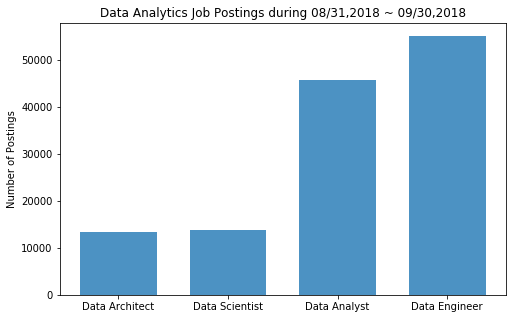

In [8]:
keywords = sorted(keyword_job, key=keyword_job.__getitem__, reverse=True)[::-1]
y_pos = np.arange(len(keywords))
count = sorted(keyword_job.values(), reverse=True)[::-1]

plt.rcParams['figure.figsize'] = (8,5)
plt.bar(y_pos, count, align='center', width=0.7, alpha=0.8)
plt.xticks(y_pos, keywords)
plt.ylabel('Number of Postings')
plt.title('Data Analytics Job Postings during {}'.format(query_period))

plt.show()

## 2. Data Analytics Job Map

#### Setting

In [47]:
# Which job are you interested in?
list_of_keyword = ['data scientist','data analyst','data engineer', 'data architect']

In [48]:
# Where are you interested in?
# Top 50 US cities of job postings in Indeed.com
list_of_location = ['Indianapolis, Indiana','Jacksonville, Florida','Los Angeles, California','Madison, Wisconsin','Fort Worth, Texas','Baltimore, Maryland','Colorado Springs, Colorado','Tucson, Arizona','Cincinnati, Ohio','Houston, Texas','Milwaukee, Wisconsin','Charlotte, North Carolina','Phoenix, Arizona','Kansas City, Missouri','Tampa, Florida','Philadelphia, Pennsylvania','San Diego, California','Columbus, Ohio','Chicago, Illinois','Irvine, California','Pittsburgh, Pennsylvania','Austin, Texas','St. Louis, Missouri','New York, New York State','Memphis, Tennessee','Minneapolis, Minnesota','Oklahoma City, Oklahoma','Omaha, Nebraska','Portland, Oregon','Raleigh, North Carolina','Dallas, Texas','Salt Lake City, Utah','Albuquerque, New Mexico','Seattle, Washington State','San Jose, California','Louisville, Kentucky','Richmond, Virginia','Sacramento, California','Orlando, Florida','Atlanta, Georgia','Miami, Florida','Denver, Colorado','Tulsa, Oklahoma','Washington, District of Columbia','San Francisco, California','Nashville, Tennessee','Las Vegas, Nevada','Boston, Massachusetts','San Antonio, Texas','Cleveland, Ohio']

#### Scrapping

In [49]:
keyword_location_job = []

for keyword in list_of_keyword:
    print('\nFor {} Jobs ({} locations):'.format(keyword.title(), len(list_of_location)))
    try:            
        soup = get_soup(get_url(keyword, 'United States', time_window, 0))
        for tag in soup.find_all("meta"):
            if tag.get("name", None) == "description":
                total_jobs = tag.get("content", None).split(' ')[0]
    except:
        try:
            time.sleep(11)
            soup = get_soup(get_url(keyword, 'United States', time_window, 0))
            for tag in soup.find_all("meta"):
                if tag.get("name", None) == "description":
                    total_jobs = tag.get("content", None).split(' ')[0]
        except:
            try:
                time.sleep(31)
                soup = get_soup(get_url(keyword, 'United States', time_window, 0))
                for tag in soup.find_all("meta"):
                    if tag.get("name", None) == "description":
                        total_jobs = tag.get("content", None).split(' ')[0]
            except:
                print('ConnectionError ', keyword) 
                continue

    total_jobs = int(total_jobs.replace(',',''))
     
        
    location_job = {}
    location_index = 0
    
    for location in list_of_location:
        location_index += 1

        try:            
            soup = get_soup(get_url(keyword, location, time_window, 0))
            for tag in soup.find_all("meta"):
                if tag.get("name", None) == "description":
                    job_count = tag.get("content", None).split(' ')[0]
        except:
            try:
                time.sleep(11)
                soup = get_soup(get_url(keyword, location, time_window, 0))
                for tag in soup.find_all("meta"):
                    if tag.get("name", None) == "description":
                        job_count = tag.get("content", None).split(' ')[0]
            except:
                try:
                    time.sleep(31)
                    soup = get_soup(get_url(keyword, location, time_window, 0))
                    for tag in soup.find_all("meta"):
                        if tag.get("name", None) == "description":
                            job_count = tag.get("content", None).split(' ')[0]
                except:
                    print('ConnectionError ', location)  
                    continue

        print(location_index, end=' ')
        
        try:    
            location_job[location] = int(job_count.replace(',',''))
        except:
            print('\n------ There are no {} job postings in {} --------'.format(keyword, location))
            continue

    print('')
    keyword_location_job.append((keyword, total_jobs, location_job))


For Data Scientist Jobs (50 locations):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

For Data Analyst Jobs (50 locations):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

For Data Engineer Jobs (50 locations):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

For Data Architect Jobs (50 locations):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 


#### Visualization

During the period of 08/31,2018 ~ 09/30,2018, 

For data scientist Jobs, 
  In San Francisco, California, there are 1087 (8.1%) data scientist job postings.
  In Washington, District of Columbia, there are 1057 (7.8%) data scientist job postings.
  In New York, New York State, there are 999 (7.4%) data scientist job postings.
  In San Jose, California, there are 980 (7.3%) data scientist job postings.
  In Boston, Massachusetts, there are 920 (6.8%) data scientist job postings.
  In Seattle, Washington State, there are 800 (5.9%) data scientist job postings.
  In Los Angeles, California, there are 398 (3.0%) data scientist job postings.
  In Denver, Colorado, there are 369 (2.7%) data scientist job postings.
  In Philadelphia, Pennsylvania, there are 350 (2.6%) data scientist job postings.
  In Chicago, Illinois, there are 316 (2.3%) data scientist job postings.
  In San Diego, California, there are 242 (1.8%) data scientist job postings.
  In Atlanta, Georgia, there are 224 (1.7%) dat

  In Chicago, Illinois, there are 1130 (2.1%) data engineer job postings.
  In Atlanta, Georgia, there are 989 (1.8%) data engineer job postings.
  In Austin, Texas, there are 893 (1.7%) data engineer job postings.
  In Philadelphia, Pennsylvania, there are 881 (1.6%) data engineer job postings.
  In Minneapolis, Minnesota, there are 834 (1.5%) data engineer job postings.
  In San Diego, California, there are 769 (1.4%) data engineer job postings.
  In Irvine, California, there are 733 (1.4%) data engineer job postings.
  In Houston, Texas, there are 711 (1.3%) data engineer job postings.
  In Phoenix, Arizona, there are 670 (1.2%) data engineer job postings.
  In Raleigh, North Carolina, there are 636 (1.2%) data engineer job postings.
  In Fort Worth, Texas, there are 635 (1.2%) data engineer job postings.
  In Portland, Oregon, there are 584 (1.1%) data engineer job postings.
  In Charlotte, North Carolina, there are 461 (0.9%) data engineer job postings.
  In Pittsburgh, Pennsylvan

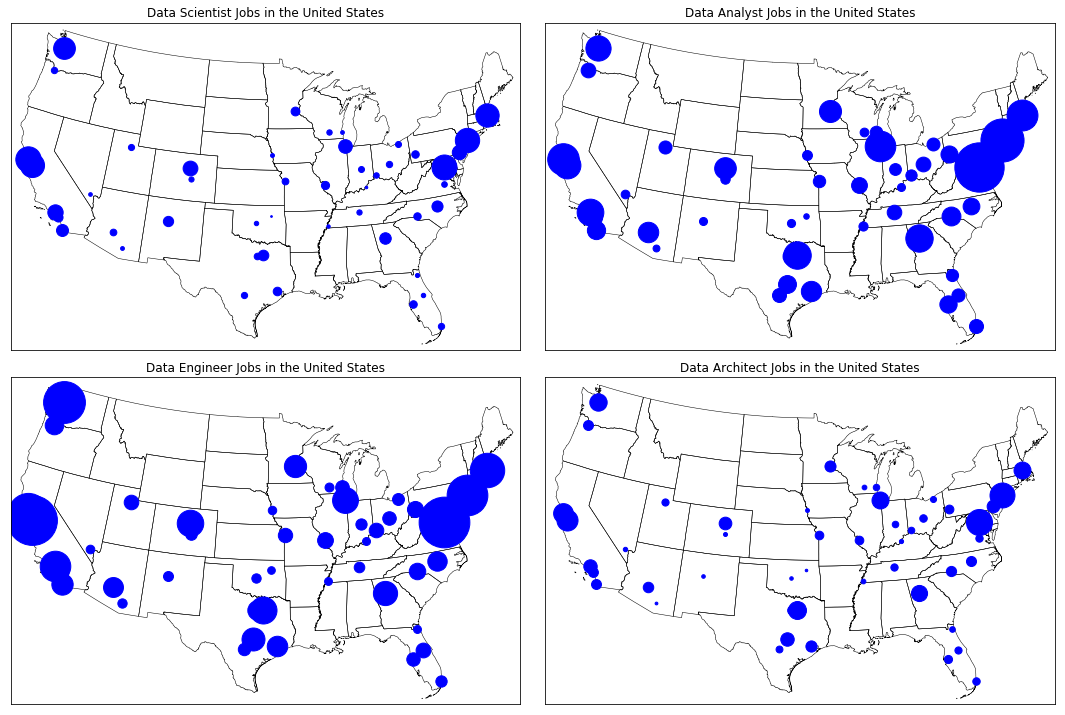

In [50]:
if len(keyword_location_job)%2 == 0:
    plt.rcParams['figure.figsize'] = (15,5*len(keyword_location_job)//2)
else:
    plt.rcParams['figure.figsize'] = (15,5*(len(keyword_location_job)//2+1))

    
print('During the period of {}, '.format(query_period))    
for i in range(len(keyword_location_job)):
    keyword = keyword_location_job[i][0]
    total_jobs = keyword_location_job[i][1]
    location_job = keyword_location_job[i][2]
    location_list = sorted(location_job, key=location_job.__getitem__, reverse=True)
    job_list = sorted(location_job.values(), reverse=True)
    
    if len(keyword_location_job)%2 == 0:
        plt.subplot(len(keyword_location_job)//2,2,i+1)
    else:
        plt.subplot(len(keyword_location_job)//2 + 1,2,i+1)
    
    plt.title(keyword.title() + ' Jobs in the United States')

    # Keep in mind to have the following files (st99_d00.shx, st99_d00.shp, st99_d00.dbf) in your directory
    # The files can be found on https://github.com/matplotlib/basemap/tree/master/examples
    map.readshapefile('maps\st99_d00', name='states', drawbounds=True)

    print('\nFor {} Jobs, '.format(keyword))
    for (location, count) in zip(location_list, job_list):
        try:
            loc = geolocator.geocode(location)
            x, y = map(loc.longitude, loc.latitude)
            percent = count/total_jobs*100
            size = math.sqrt(count)/1.3
            map.plot(x,y,marker='o',color='Blue',markersize=size)
            print('  In {}, there are {} ({:.1f}%) {} job postings.'.format(location, count, percent, keyword))  
        except:
            pass

plt.tight_layout()
plt.show()

## 3. Required Skills for Data Analytics

#### Setting

In [13]:
# Which job are you interested in?
list_of_keyword = ['data scientist','data analyst','data engineer', 'data architect']

In [14]:
# Where are you interested in?
location = 'United States'

In [15]:
# Define skill sets you are intrested in

# Top 20 programing languages (in demand) based on IEEE Spectrum ranking 2018 (https://spectrum.ieee.org/static/interactive-the-top-programming-languages-2018)
program_languages = ['Python', 'Java', 'C', 'C++', 'C#', 'JavaScript', 'Assembly', 'PHP', 'HTML', 'Scala', 'Shell', 'Ruby', 'Matlab', 'R', 'Perl', 'Go', 'SQL', 'Objective-C', 'Arduino', 'Swift']
analysis_tool = ['Excel', 'SAS', 'STATA', 'SPSS', 'R', 'Matlab', 'Minitab']
machine_learning = ['Machine Learning','Natural Language Processing','Image Processing','Artificial Intelligence','TensorFlow', 'Pytorch', 'Caffe']

databases = ['SQL','NoSQL','HBase','Cassandra','MongoDB','MySQL','SQL Server', 'Oracle', 'JSON']
bigdata_tool = ['Hadoop','MapReduce','Spark','Pig','Hive','Shark','Impala','Oozie','ZooKeeper','Flume','Mahout']
cloud_services = ['AWS', 'Azure', 'Google Cloud']

visualization_tool = ['Tableau', 'Plotly', 'D3.js', 'Google Chart', 'Chart.js', 'HighCharts']


# Merge skill sets and remove duplicates
list_of_skill = list(set(program_languages + analysis_tool + machine_learning + databases + bigdata_tool+ cloud_services + visualization_tool))

#### Scrapping

In [16]:
keyword_skill_job = []

for keyword in list_of_keyword:
    print('\nFor {} Jobs ({} skills):'.format(keyword.title(), len(list_of_skill)))
    try:
        soup = get_soup(get_url(keyword, location, time_window, 0))
        for tag in soup.find_all("meta"):
            if tag.get("name", None) == "description":
                total_jobs = tag.get("content", None).split(' ')[0]
    except:
        try:
            time.sleep(11)
            soup = get_soup(get_url(keyword, location, time_window, 0))
            for tag in soup.find_all("meta"):
                if tag.get("name", None) == "description":
                    total_jobs = tag.get("content", None).split(' ')[0]
        except:
            try:
                time.sleep(31)
                soup = get_soup(get_url(keyword, location, time_window, 0))
                for tag in soup.find_all("meta"):
                    if tag.get("name", None) == "description":
                        total_jobs = tag.get("content", None).split(' ')[0]
            except:
                print('ConnectionError ', keyword) 
                continue
                
    try:    
        total_jobs = int(total_jobs.replace(',',''))
    except:
        print('------ There are no {} job postings --------'.format(keyword))
        continue
     
        
    skill_job = {}
    skill_index = 0
    
    for skill in list_of_skill:
        keyword_ = keyword + ' ' + skill
        skill_index += 1

        try:            
            soup = get_soup(get_url(keyword_, location, time_window, 0))
            for tag in soup.find_all("meta"):
                if tag.get("name", None) == "description":
                    job_count = tag.get("content", None).split(' ')[0]
        except:
            try:
                time.sleep(11)
                soup = get_soup(get_url(keyword_, location, time_window, 0))
                for tag in soup.find_all("meta"):
                    if tag.get("name", None) == "description":
                        job_count = tag.get("content", None).split(' ')[0]
            except:
                try:
                    time.sleep(31)
                    soup = get_soup(get_url(keyword_, location, time_window, 0))
                    for tag in soup.find_all("meta"):
                        if tag.get("name", None) == "description":
                            job_count = tag.get("content", None).split(' ')[0]
                except:
                    print('ConnectionError ', skill)  
                    continue

        print(skill_index, end=' ')
        
        try:    
            skill_job[skill] = int(job_count.replace(',',''))
        except:
            print('\n------ There are no {} job postings requiring {} --------'.format(keyword, skill))
            continue
   
    print('')
    keyword_skill_job.append((keyword, total_jobs, skill_job))


For Data Scientist Jobs (60 skills):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 

For Data Analyst Jobs (60 skills):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 
------ There are no data analyst job postings requiring Chart.js --------
15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 
------ There are no data analyst job postings requiring Arduino --------
30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 

For Data Engineer Jobs (60 skills):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 

For Data Architect Jobs (60 skills):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 
------ There are no data architect job postings requiring Plotly --------
16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 

#### Visualization

During the period of 08/31,2018 ~ 09/30,2018, 

For data scientist Jobs, 
  There are 4273 (30.9%) data scientist job postings requiring Python.
  There are 3591 (26.0%) data scientist job postings requiring Machine Learning.
  There are 3030 (21.9%) data scientist job postings requiring SAS.
  There are 2839 (20.5%) data scientist job postings requiring Excel.
  There are 2809 (20.3%) data scientist job postings requiring SQL.
  There are 2559 (18.5%) data scientist job postings requiring R.
  There are 2031 (14.7%) data scientist job postings requiring Java.
  There are 1649 (11.9%) data scientist job postings requiring Hadoop.
  There are 1540 (11.1%) data scientist job postings requiring Spark.
  There are 1383 (10.0%) data scientist job postings requiring C++.
  There are 1137 (8.2%) data scientist job postings requiring AWS.
  There are 1133 (8.2%) data scientist job postings requiring C.
  There are 1115 (8.1%) data scientist job postings requiring Tableau.
  There are 937 (6.8%

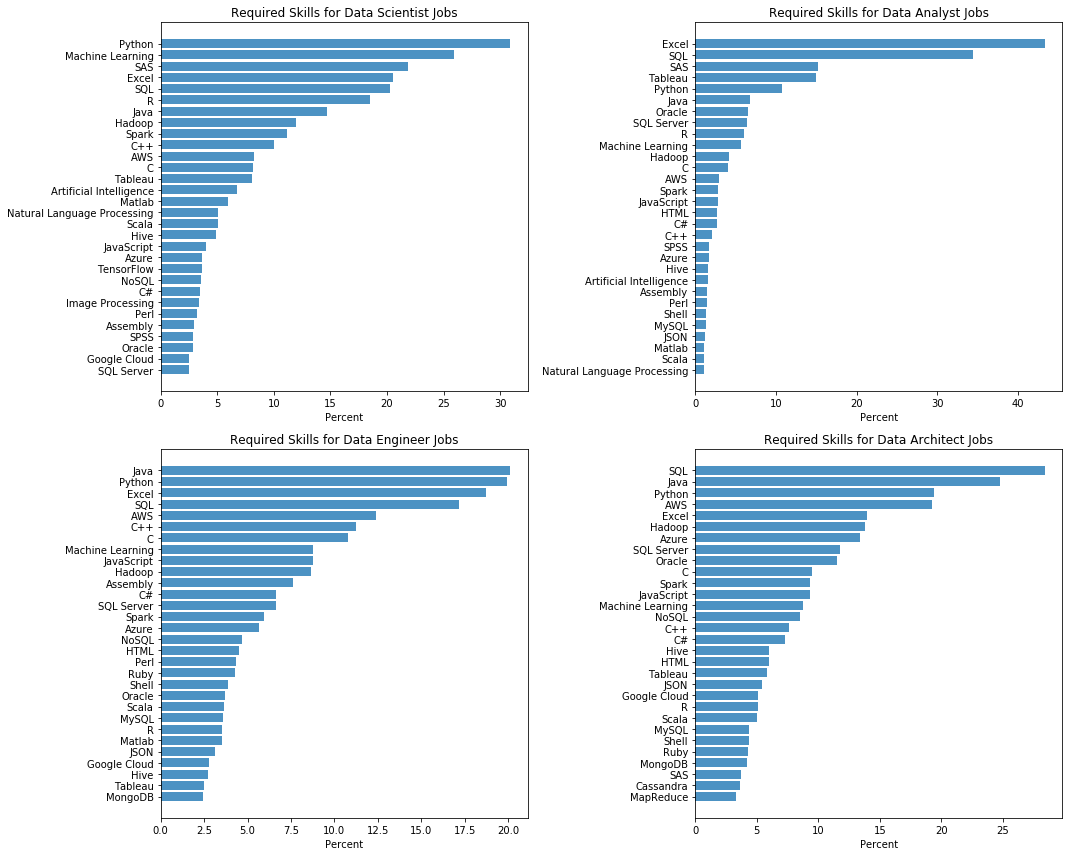

In [17]:
if len(keyword_skill_job)%2 == 0:
    plt.rcParams['figure.figsize'] = (15,6*len(keyword_skill_job)//2)
else:
    plt.rcParams['figure.figsize'] = (15,6*(len(keyword_skill_job)//2+1))

    
print('During the period of {}, '.format(query_period))    
for i in range(len(keyword_skill_job)):
    keyword = keyword_skill_job[i][0]
    total_jobs = keyword_skill_job[i][1]
    skill_job = keyword_skill_job[i][2]
    
    top30_skills = sorted(skill_job, key=skill_job.__getitem__, reverse=True)[0:30]
    y_pos = np.arange(len(top30_skills))
    count = sorted(skill_job.values(), reverse=True)[0:30]
    percent = [c/total_jobs*100 for c in count]
    
    print('\nFor {} Jobs, '.format(keyword))
    for j in range(len(top30_skills)):
        print('  There are {} ({:.1f}%) {} job postings requiring {}.'.format(count[j], percent[j], keyword, top30_skills[j])) 

        
    if len(keyword_skill_job)%2 == 0:
        plt.subplot(len(keyword_skill_job)//2,2,i+1)
    else:
        plt.subplot(len(keyword_skill_job)//2 + 1,2,i+1)
    
    top30_skills = top30_skills[::-1]
    percent = percent[::-1]
    plt.barh(y_pos, percent, align='center', height = 0.8,  alpha=0.8)
    plt.yticks(y_pos, top30_skills)
    plt.xlabel('Percent')
    plt.title('Required Skills for '+ keyword.title() + ' Jobs')

plt.tight_layout()
plt.show()

## 4. Data Analytics Job Characteristics
- It may take several hours in scrapping detailed information for more than ten thousand job postings.
- You can do it faster by limiting the number of jobs to be scrapped.

#### Setting

In [18]:
# Range: 1 ~ 1000 (maximum number of queries on Indeed.com)
max_results_limit = 1000 

In [19]:
# Which job are you interested in?
keyword__ = 'data scientist'

# keyword__ = 'data analyst'
# keyword__ = 'data engineer'
# keyword__ = 'data architect'

In [20]:
# 50 states + DC 
# California is subdivided into four major cities or IT cluster
list_of_location = ['Alabama','Alaska','Arizona','Arkansas','Connecticut','Delaware','Florida','Georgia','New York','Colorado','Hawaii', 'Idaho','Illinois',
                    'Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi', 'Missouri','Montana',
                    'Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','North Carolina','North Dakota','Ohio','Oklahoma','Oregon', 'Pennsylvania','Rhode Island',
                    'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia', 'Wisconsin','Wyoming','Washington, DC',   
                    'San Francisco, CA', 'Silicon Valley, CA', 'Los Angeles, CA', 'San Diego, CA']

#### Scrapping

In [21]:
df_list = pd.DataFrame(columns=["Title","Company", "Location","Salary", "Summary", "Description", "Company Rating"])
location_index = 0

for location in list_of_location:
    location_index += 1
    location_count = 0
    
    # count the number of jobs
    max_results_per_location = 0
    try:            
        soup = get_soup(get_url(keyword__, location, time_window, 0))
        for tag in soup.find_all("meta"):
            if tag.get("name", None) == "description":
                max_results_per_location = tag.get("content", None).split(' ')[0].replace(',','')
    except:
        try:
            time.sleep(11)
            soup = get_soup(get_url(keyword__, location, time_window, 0))
            for tag in soup.find_all("meta"):
                if tag.get("name", None) == "description":
                    max_results_per_location = tag.get("content", None).split(' ')[0].replace(',','')
        except:
            pass
    try:    
        max_results_per_location = int(max_results_per_location)
    except:
        print('------ There are no job postings in {} --------'.format(location))
        continue
    
    if (max_results_per_location == 0) or (max_results_per_location > max_results_limit):
        max_results_per_location = max_results_limit
        
        
    for start in range(0, max_results_per_location, 50):
        # request URL
        try:
            soup = get_soup(get_url(keyword__, location, time_window, start))            
        except:
            try:
                time.sleep(11)
                soup = get_soup(get_url(keyword__, location, time_window, start)) 
            except:
                try:
                    time.sleep(31)
                    soup = get_soup(get_url(keyword__, location, time_window, start))
                except:
                    try:
                        time.sleep(181)
                        soup = get_soup(get_url(keyword__, location, time_window, start))
                    except:
                        print('ConnectionError ', location_count)  
                        continue
                
        for each in soup.find_all(class_= "result" ):
            # scrape job title
            try: 
                title = each.find(class_='jobtitle').text.replace('\n', '')
            except:
                title = None
                
            # scrape company name
            try: 
                company = each.find(class_='company').text.replace('\n', '').split('        ')[1]
            except:
                company = None
                
            # scrape company location
            try:
                company_location = each.find('span', {'class':"location" }).text.replace('\n', '')
            except:
                company_location = None
                
            # scrape job salary
            try:
                salary = each.find('span', {'class':'no-wrap'}).text.replace('\n', '')
                salary_ = salary.replace('$', '').replace('                ','').replace(',','').split(' ')
                if len(salary_) == 3 or len(salary_) == 4:
                    if salary_[2]=='hour':
                        salary_[0] = float(salary_[0]) * 2080
                        salary_[2] = salary_[0]
                    elif salary_[2]=='day':
                        salary_[0] = float(salary_[0]) * 365
                        salary_[2] = salary_[0]
                    elif salary_[2]=='month':
                        salary_[0] = float(salary_[0]) * 12
                        salary_[2] = salary_[0]
                    else:
                        salary_[0] = float(salary_[0])
                        salary_[2] = salary_[0]
                        
                if len(salary_) == 5 or len(salary_) == 6:
                    if salary_[4]=='hour':
                        salary_[0] = float(salary_[0]) * 2080
                        salary_[2] = float(salary_[2]) * 2080
                    elif salary_[4]=='day':
                        salary_[0] = float(salary_[0]) * 365
                        salary_[2] = float(salary_[2]) * 365
                    elif salary_[4]=='month':
                        salary_[0] = float(salary_[0]) * 12
                        salary_[2] = float(salary_[2]) * 12
                    else:
                        salary_[0] = float(salary_[0])
                        salary_[2] = float(salary_[2])
                        
                salary_avg = (salary_[0]+salary_[2])/2
            except:
                salary_avg = None
                
            # scrape job descriptions                    
            try:
                summary = each.find('span', {'class':'summary'}).text.replace('.', '')            
            except:
                summary = ""
            
            try:
                description_url = each.find(class_='jobtitle').find('a')['href']
                description_url = 'https://www.indeed.com'+ description_url
                description_soup = get_soup(description_url)

                try:
                    description_s = description_soup.find('div', {'class':'jobsearch-JobComponent-description icl-u-xs-mt--md'})
                    description = description_s.text
                except:
                    try:
                        description_s = description_soup.find('span', {'class':'summary'})
                        description = description_s.text
                    except:
                        description = ""
            except:
                description = ""
                
            # scrape company rating             
            try:
                company_url = each.find(class_='company').find('a')['href']
                company_url = 'https://www.indeed.com'+ company_url
                company_soup = get_soup(company_url)

                try:
                    company_rate_score = company_soup.find_all('span', {'class':'cmp-ReviewCategory-rating'})
                    company_rate_name = company_soup.find_all('span', {'class':'cmp-ReviewCategory-name'})
                    company_rate = {n.text:float(s.text) for n, s in zip(company_rate_name, company_rate_score)}
                    if len(company_rate)==0:
                        company_rate = None
                except:
                    company_rate = None
            except:
                company_rate = None

                
            # store all scraped informatino             
            df_list = df_list.append({"Title":title, "Company":company, "Location":company_location,  "Salary":salary_avg, 
                                      "Summary":summary, "Description": description, "Company Rating": company_rate}, ignore_index=True)
            
            location_count += 1
            if location_count % 100 == 0:
                print('In {}, {} jobs are scrapped.'.format(location, location_count))
                ran = [0,1,2,3,4,5,6,7]
                time.sleep(random.choice(ran))
                
    print('------ {} ({}/{}) scrapping finished --------'.format(location, location_index, len(list_of_location)))
    df_list = df_list.drop_duplicates(['Title', 'Company', 'Location'], keep='first')

In Alabama, 100 jobs are scrapped.
------ Alabama (1/54) scrapping finished --------
------ Alaska (2/54) scrapping finished --------
In Arizona, 100 jobs are scrapped.
------ Arizona (3/54) scrapping finished --------
------ Arkansas (4/54) scrapping finished --------
In Connecticut, 100 jobs are scrapped.
------ Connecticut (5/54) scrapping finished --------
In Delaware, 100 jobs are scrapped.
------ Delaware (6/54) scrapping finished --------
In Florida, 100 jobs are scrapped.
In Florida, 200 jobs are scrapped.
In Florida, 300 jobs are scrapped.
------ Florida (7/54) scrapping finished --------
In Georgia, 100 jobs are scrapped.
In Georgia, 200 jobs are scrapped.
------ Georgia (8/54) scrapping finished --------
In New York, 100 jobs are scrapped.
In New York, 200 jobs are scrapped.
In New York, 300 jobs are scrapped.
In New York, 400 jobs are scrapped.
In New York, 500 jobs are scrapped.
In New York, 600 jobs are scrapped.
In New York, 700 jobs are scrapped.
In New York, 800 jobs a

In [22]:
df_list

,Title,Company,Location,Salary,Summary,Description,Company Rating
0,Data Scientist,"Altec Industries, Inc.","Birmingham, AL 35242",NaN,\n Experience with advanced data an...,Why Join Altec?\nIf you’re considering a caree...,"{'Work/Life Balance ': 3.2, 'Compensation/Bene..."
1,Associate Data Scientist,Protective Life Corporation,"Birmingham, AL 35223",NaN,"\n As an Associate Data Scientist, ...","Protective Life Corporation, which today offer...","{'Work/Life Balance ': 3.8, 'Compensation/Bene..."
2,Data Scientist,Booz Allen Hamilton,"Huntsville, AL",NaN,\n Apply expertise in advanced anal...,Data Scientist\nKey Role:\nApply expertise in ...,"{'Work/Life Balance ': 3.9, 'Compensation/Bene..."
3,Data Scientist,PANGEATWO,"Birmingham, AL",82500.0,\n Design data processes to help en...,"Data Scientist\n$ 6 5,000 - $100,000\nBirmingh...","{'Work/Life Balance ': 4.0, 'Compensation/Bene..."
4,"Data Scientist, Senior",Booz Allen Hamilton,"Huntsville, AL",NaN,"\nData Scientist, Senior You’ll have access to...","Data Scientist, Senior\nThe Challenge:\nAre yo...","{'Work/Life Balance ': 3.9, 'Compensation/Bene..."
5,SCIENTIST I,UAB,"Birmingham, AL",NaN,"\n Assists in designing, performing...",SCIENTIST I\n - (T56257)\n\nTo employ a broad ...,"{'Work/Life Balance ': 4.0, 'Compensation/Bene..."
6,IRES - Data Scientist (AS0003XO),MEI Technologies,"Huntsville, AL 35805",NaN,"\n Java, Microsoft Certified Soluti...",Overview\nNO THIRD PARTY RECRUITERS PLEASE\n\n...,"{'Work/Life Balance ': 3.7, 'Compensation/Bene..."
7,"Physical Scientist, GS-1301-13 (DE/CR)",US Department of Commerce,"Tuscaloosa, AL",100340.0,"\n As a Physical Scientist, you wil...",Duties\nSummary\n\nUSAJOBS will be performing ...,"{'Work/Life Balance ': 4.1, 'Compensation/Bene..."
8,Data Scientist,HX5,"Huntsville, AL 35801",NaN,"\n Java, Microsoft Certified Soluti...",Data Scientist\nEngineering Specialist II\nRed...,"{'Work/Life Balance ': 4.8, 'Compensation/Bene..."
9,Scientist 3,Thermo Fisher Scientific,Alabama,NaN,\n Thermo Fisher Scientific is an E...,Job Description\nScientist 3\n\nSummary\n\nThi...,"{'Work/Life Balance ': 3.4, 'Compensation/Bene..."


### 4.1 Salary

In [23]:
salary_list = df_list["Salary"].dropna().tolist()

print('During the period of {}, '.format(query_period)) 
print('Average Annual Salary of {}: ${:.1f}'.format(keyword__.title(), np.mean(salary_list)))

During the period of 08/31,2018 ~ 09/30,2018, 
Average Annual Salary of Data Scientist: $91173.3


### 4.2 Company Rating

During the period of 08/31,2018 ~ 09/30,2018, 
Average Rating of Work/Life Balance: 3.76
Average Rating of Work/Life Balance: 0.43
Average Rating of Compensation/Benefits: 3.77
Average Rating of Job Security/Advancement: 3.34
Average Rating of Management: 3.42
Average Rating of Culture: 3.67


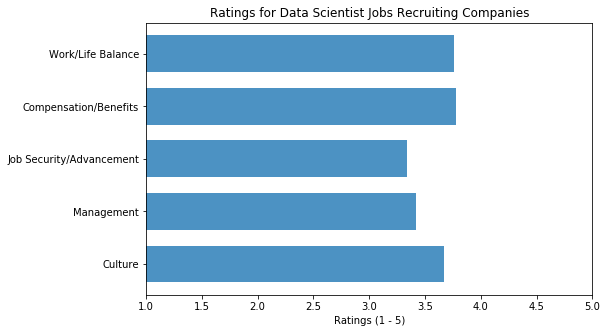

In [42]:
rating_list = df_list["Company Rating"].dropna().tolist()
rating_worklife_balance = [a['Work/Life Balance '] for a in rating_list]
rating_compensation = [a['Compensation/Benefits '] for a in rating_list]
rating_jobsecurity = [a['Job Security/Advancement '] for a in rating_list]
rating_management = [a['Management '] for a in rating_list]
rating_culture = [a['Culture '] for a in rating_list]

print('During the period of {}, '.format(query_period)) 
print('Average Rating of Work/Life Balance: {:.2f}'.format(np.mean(rating_worklife_balance)))
print('Average Rating of Work/Life Balance: {:.2f}'.format(np.std(rating_worklife_balance)))
print('Average Rating of Compensation/Benefits: {:.2f}'.format(np.mean(rating_compensation)))
print('Average Rating of Job Security/Advancement: {:.2f}'.format(np.mean(rating_jobsecurity)))
print('Average Rating of Management: {:.2f}'.format(np.mean(rating_management)))
print('Average Rating of Culture: {:.2f}'.format(np.mean(rating_culture)))


items = ['Work/Life Balance', 'Compensation/Benefits', 'Job Security/Advancement', 'Management', 'Culture'][::-1]
y_pos = np.arange(len(items))
ratings = [np.mean(rating_worklife_balance), np.mean(rating_compensation), np.mean(rating_jobsecurity), np.mean(rating_management), np.mean(rating_culture)][::-1]

plt.rcParams['figure.figsize'] = (8,5)
plt.xlim([1, 5])
plt.barh(y_pos, ratings, align='center', height=0.7, alpha=0.8)
plt.yticks(y_pos, items)
plt.xlabel('Ratings (1 - 5)')
plt.title('Ratings for {} Jobs Recruiting Companies'.format(keyword__.title()))

plt.show()

### 4.3 Word Cloud for Job Descriptions

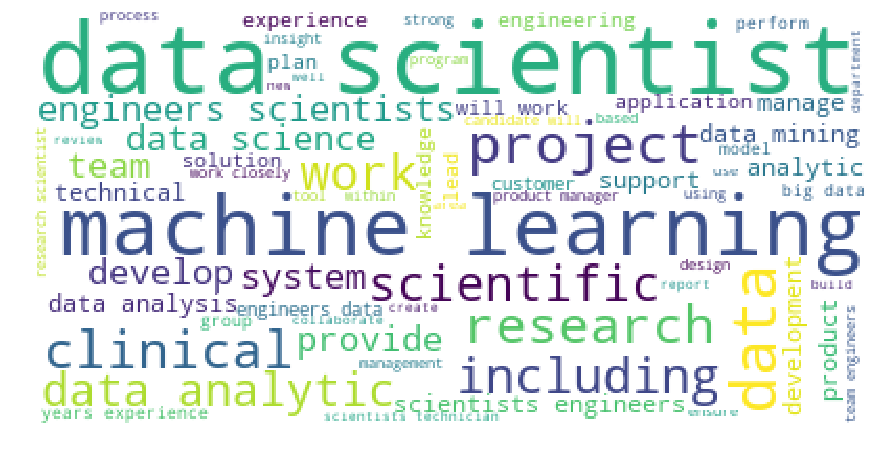

In [40]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(
                        background_color = 'white',
                        stopwords = set(STOPWORDS),
                        max_font_size = 60,
                        min_font_size = 6,
                        max_words = 200,
                        ).generate(' '.join(df_list['Summary']).lower())

plt.rcParams['figure.figsize'] = (15,10)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 4.4 Saving the job list as a csv file

In [41]:
now = datetime.now()
df_list.to_csv(keyword__.title() + ' Jobs List' + now.strftime("_%m%d%y")+'.csv', encoding='utf-8')